### Capstone project two: EDA, Processing and training data development, and modeling. 

### 1. EDA

importing necissary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, classification_report, f1_score, auc,
                             accuracy_score, precision_score, recall_score, roc_curve)

importing data 

In [2]:
columnDescription = pd.read_csv('colDescriptionT.csv')
previous_application = pd.read_csv('previous_application.csv')
application_data = pd.read_csv('application_data.csv')

ensuring data was imported properly

In [3]:
display(columnDescription.head())
display(previous_application.head())
display(application_data.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,application_data,...,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv,previous_application.csv
1,ID of loan in our sample,Target variable (1 - client with payment diffi...,Identification if loan is cash or revolving,Gender of the client,Flag if the client owns a car,Flag if client owns a house or flat,Number of children the client has,Income of the client,Credit amount of the loan,Loan annuity,...,The industry of the seller,Term of previous credit at application of the ...,Grouped interest rate into small medium and hi...,Detailed product combination of the previous a...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Relative to application date of current applic...,Did the client requested insurance during the ...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,grouped,NaN,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,time only relative to the application,NaN


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Data cleaning

checking null values of the df previous_applications

Text(0.5, 0, 'COLUMNS')

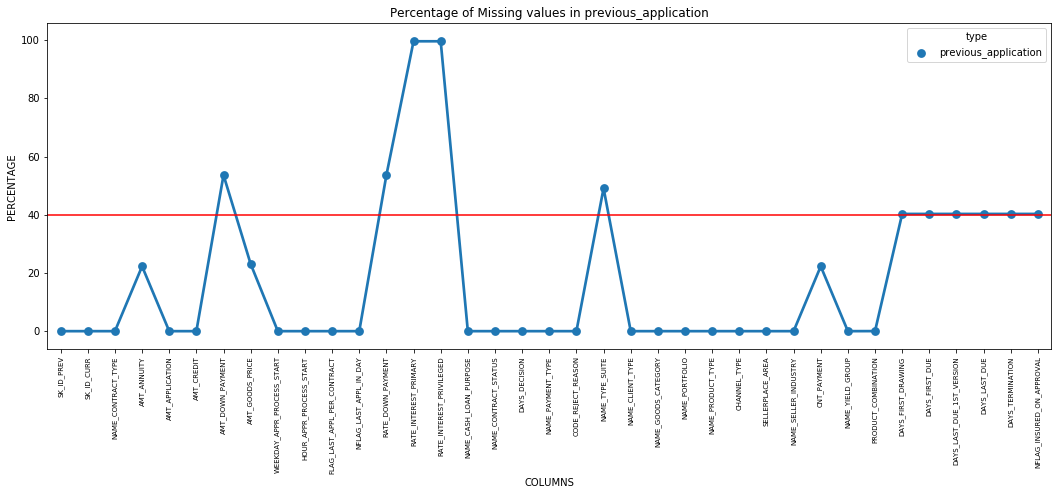

In [4]:
fig = plt.figure(figsize=(18,6))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
ax.axhline(40,color='red')
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in previous_application")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")

checking percentage of null values in previous_application df

In [5]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

dropping any data thats missing 40% or more

In [6]:
previous_application=previous_application.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
        'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis=1)

now that any columns that are missing more than 40% are dropped, the other columns missing less than 40% will be filled with the mean of the column. <br>
below is a graph of the rest of our missing values

Text(0.5, 0, 'Columns')

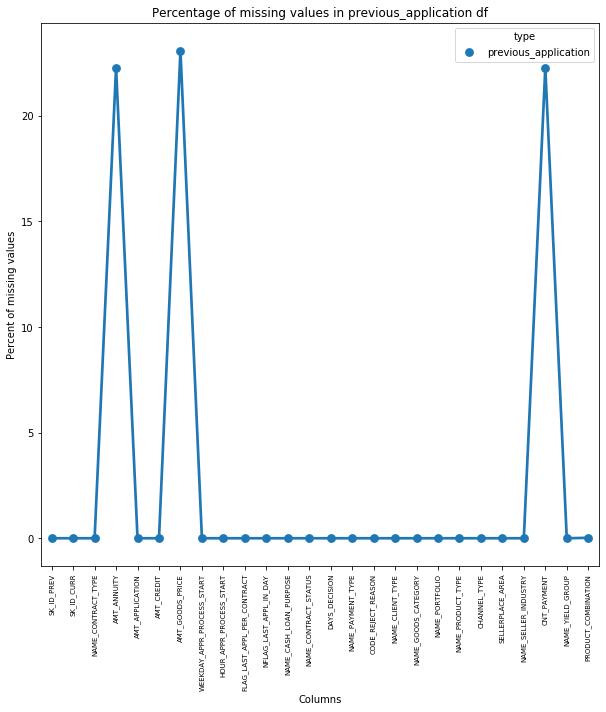

In [7]:
fig = plt.figure(figsize=(10,10))
miss_previous_application = pd.DataFrame((previous_application.isnull().sum())*100/previous_application.shape[0]).reset_index()
miss_previous_application["type"] = "previous_application"
ax = sns.pointplot("index",0,data=miss_previous_application,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of missing values in previous_application df")
plt.ylabel("Percent of missing values")
plt.xlabel("Columns")

In [8]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

as seen above, 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT' are still missing just over 20% of the inputs. a loop is created to fill the missing values in one cell below

In [9]:
fillList = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT'] #list of columns with NULL values

for i in fillList:
    previous_application[i].fillna(previous_application[i].mean(), inplace = True)
#this loop fills missing values in three columns

the three columns 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT' are numerical. we still have PRODUCT_COMBINATION column missing 0.02% of its values however, this column is has inputs of type object so the function 'mean()' would be ineffective here. instead, the missing values of this column is filled with 'cash' since thats the most present string

In [10]:
previous_application.PRODUCT_COMBINATION.value_counts()
#majority is Cash so we will fill any NA with cash 

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [11]:
previous_application['PRODUCT_COMBINATION'].fillna('Cash', inplace =True)

ensuring there are no more missing values

In [12]:
round(100*(previous_application.isnull().sum()/len(previous_application.index)),2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_ANNUITY                    0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
CNT_PAYMENT                    0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

### cleaning application_data data frame <br> 


Text(0.5, 0, 'Columns')

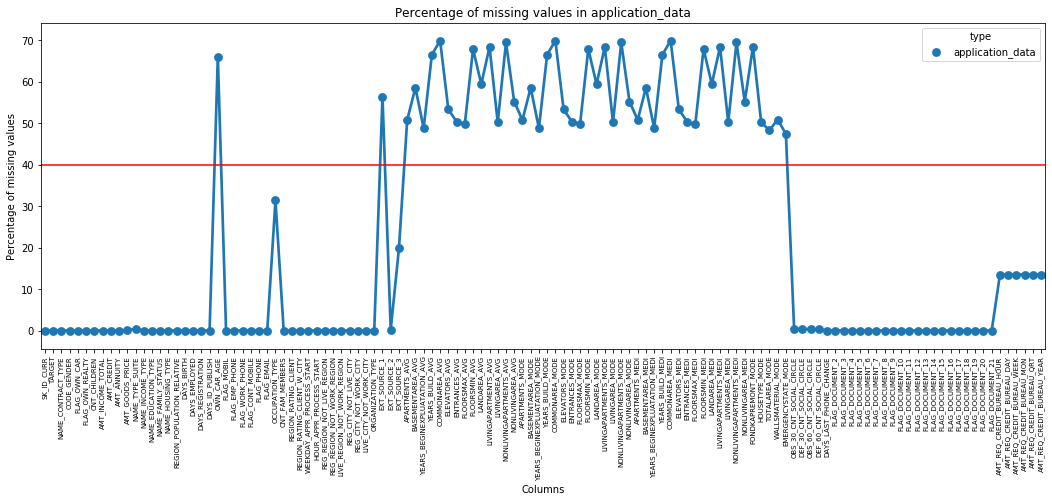

In [13]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40,color='red')
plt.title("Percentage of missing values in application_data")
plt.ylabel("Percentage of missing values")
plt.xlabel("Columns")

As we can see from the plot above, application data has significantly more missing values. just like before, any columns missing more than 40% will be dropped

In [14]:


application_data=application_data.drop([ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],axis=1)

ensuring columns with more then 40% null values where propperly dropped

Text(0.5, 0, 'COLUMNS')

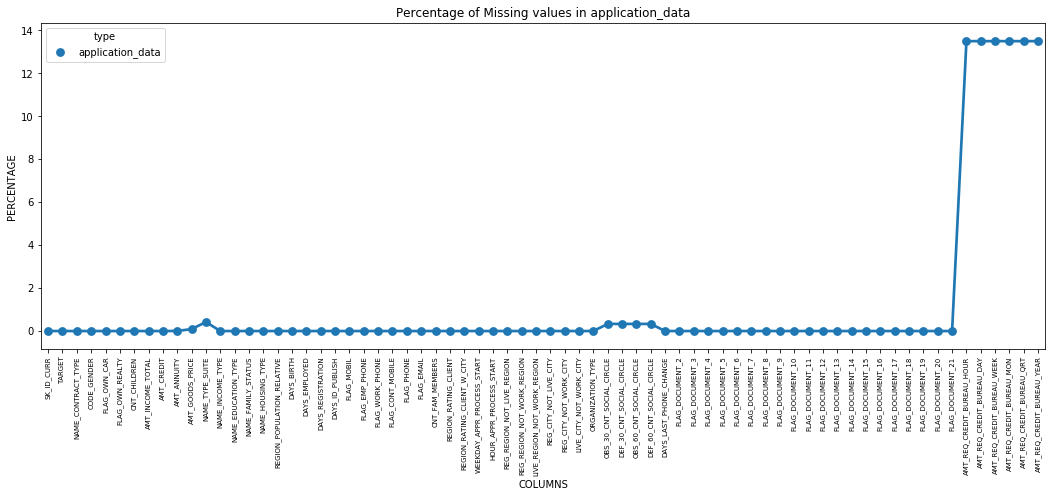

In [15]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")

creating a list of columns that need to be filled in with the mean of each column

In [16]:
fillList2 = ['AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
        'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE']

In [17]:
for i in fillList2:
    application_data[i].fillna(application_data[i].mean(), inplace = True)

In [18]:
application_data.NAME_TYPE_SUITE.value_counts()
#majority is Unaccompanied so NA will be filled with Unaccompanied as well

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [19]:
application_data.drop("NAME_TYPE_SUITE", axis = 1, inplace = True)

Text(0.5, 0, 'COLUMNS')

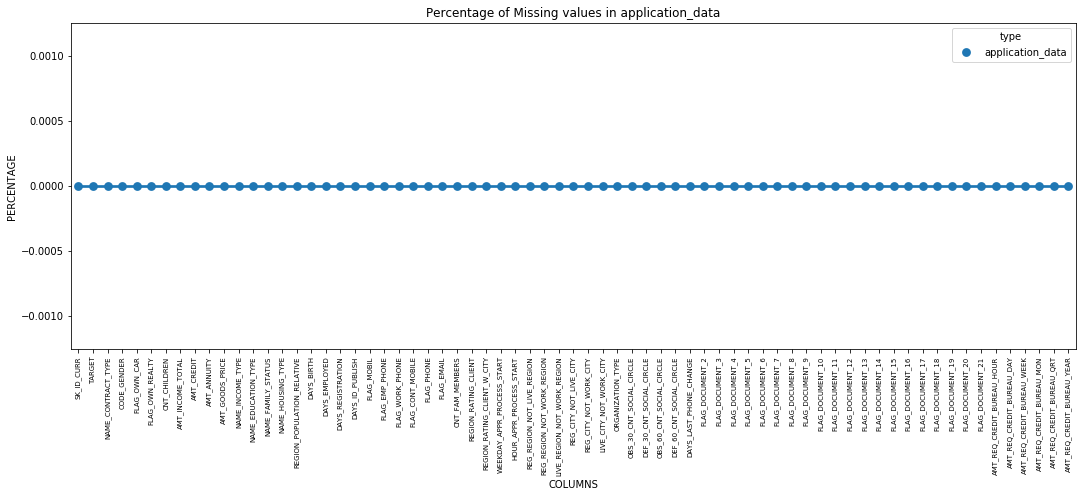

In [20]:
fig = plt.figure(figsize=(18,6))
miss_application_data = pd.DataFrame((application_data.isnull().sum())*100/application_data.shape[0]).reset_index()
miss_application_data["type"] = "application_data"
ax = sns.pointplot("index",0,data=miss_application_data,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")

### done cleaning <br>
application_data and previous_applications have now been cleaned and are NA free

now looking for relationships between the features

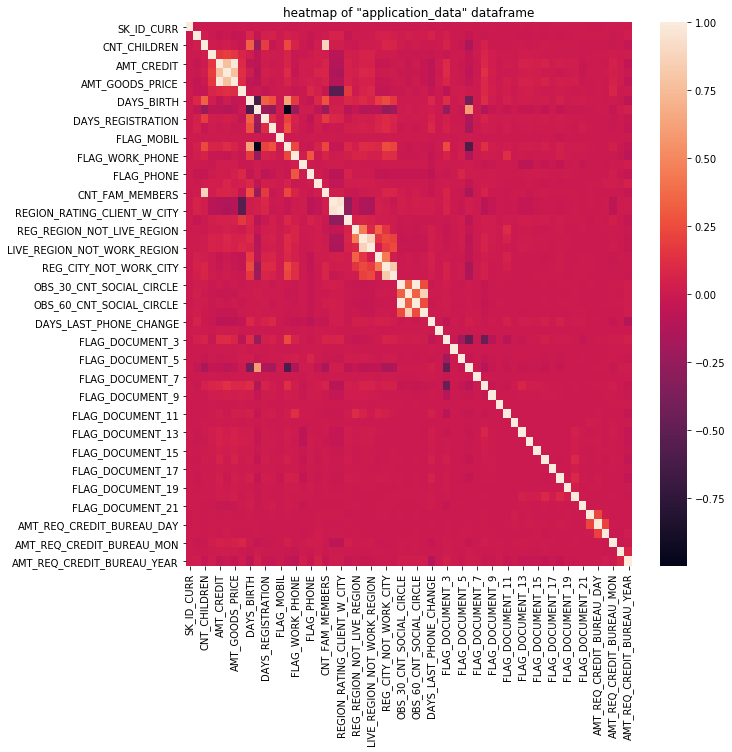

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(application_data.corr())
plt.title('heatmap of "application_data" dataframe')
plt.show()

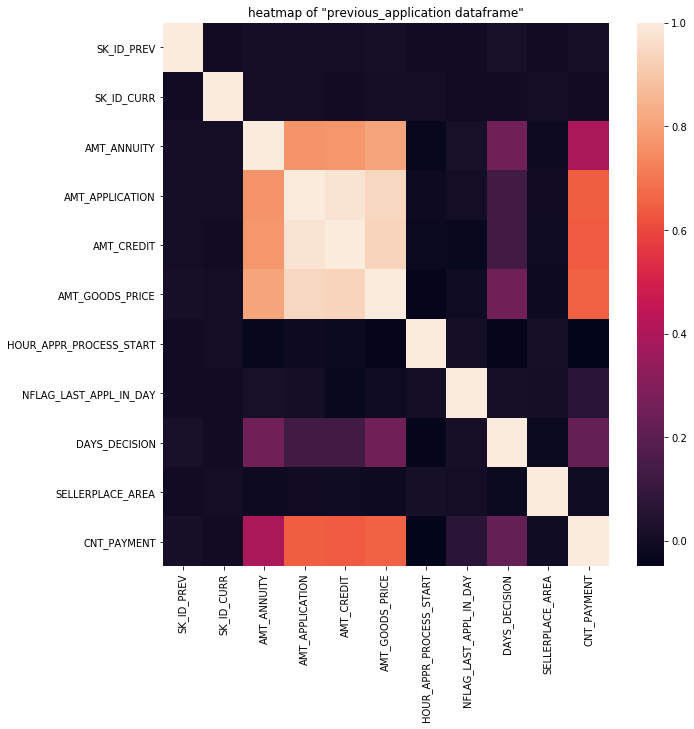

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(previous_application.corr())
plt.title('heatmap of "previous_application dataframe"')
plt.show()

printing the top 10 corrilations of the 'previous_application' df

In [23]:
corr = previous_application.corr() 
corrdf = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Variable 1', 'Variable 2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

,Variable 1,Variable 2,Correlation
47,AMT_CREDIT,AMT_APPLICATION,0.98
59,AMT_GOODS_PRICE,AMT_CREDIT,0.94
58,AMT_GOODS_PRICE,AMT_APPLICATION,0.94
57,AMT_GOODS_PRICE,AMT_ANNUITY,0.81
35,AMT_APPLICATION,AMT_ANNUITY,0.77
46,AMT_CREDIT,AMT_ANNUITY,0.77
115,CNT_PAYMENT,AMT_GOODS_PRICE,0.65
113,CNT_PAYMENT,AMT_APPLICATION,0.65
114,CNT_PAYMENT,AMT_CREDIT,0.64
112,CNT_PAYMENT,AMT_ANNUITY,0.39


### 2. processing and data training development 

merging application_data and previous_applications on the id of the applicants

In [24]:
mergeddf =  pd.merge(application_data,previous_application,on='SK_ID_CURR')
mergeddf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


double checking for any missing values

In [25]:
display(mergeddf.isnull().sum())

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE_x    0
CODE_GENDER             0
FLAG_OWN_CAR            0
                       ..
SELLERPLACE_AREA        0
NAME_SELLER_INDUSTRY    0
CNT_PAYMENT             0
NAME_YIELD_GROUP        0
PRODUCT_COMBINATION     0
Length: 94, dtype: int64

In [26]:
round(100*(mergeddf.isnull().sum()/len(mergeddf.index)), 2)

SK_ID_CURR              0.0
TARGET                  0.0
NAME_CONTRACT_TYPE_x    0.0
CODE_GENDER             0.0
FLAG_OWN_CAR            0.0
                       ... 
SELLERPLACE_AREA        0.0
NAME_SELLER_INDUSTRY    0.0
CNT_PAYMENT             0.0
NAME_YIELD_GROUP        0.0
PRODUCT_COMBINATION     0.0
Length: 94, dtype: float64

In [27]:
mergeddf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [28]:
#dropping SK_ID_CURR since it all unique values

mergeddf.drop(['SK_ID_CURR'], 1, inplace = True)

In [29]:
mergeddf.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [30]:
# Rest missing values are under 1.5% so we can drop these rows.
mergeddf.dropna(inplace = True)

In [31]:
# List of variables to map

varlist =  ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_LAST_APPL_PER_CONTRACT']

# Defining the map function
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

# Applying the function to the housing list
mergeddf[varlist] = mergeddf[varlist].apply(binary_map)
mergeddf.head()


,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [32]:
#dropping SK_ID_PREV since non required technical field 

mergeddf.drop(['SK_ID_PREV'], 1, inplace = True)
mergeddf.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [33]:
mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
 'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
 ]]= mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                        'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                        'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                        'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                        'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                        'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                                        'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                        'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                        'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                        ]].astype('category')

### createing dummy variables

In [34]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(mergeddf[['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                                  'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                                  'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                                  'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                                  'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                                  'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                                  'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                                  'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                                  'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                                  'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                                  'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                                  'NAME_CONTRACT_TYPE_x','CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                                  'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                                  'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                                  'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                                  'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                                  'NAME_YIELD_GROUP','PRODUCT_COMBINATION']], drop_first=True)
dummy1.head()

,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_1,FLAG_EMP_PHONE_1,FLAG_WORK_PHONE_1,FLAG_CONT_MOBILE_1,FLAG_PHONE_1,FLAG_EMAIL_1,REGION_RATING_CLIENT_2,REGION_RATING_CLIENT_3,REGION_RATING_CLIENT_W_CITY_2,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,0,1,1,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [35]:
# Adding the results to the main dataframe
mergeddf = pd.concat([mergeddf, dummy1], axis=1)
mergeddf.head()

,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,1,0
1,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,1,0,0,0,0,0,0,0,0,0
2,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,1,0,0,0,0,0
3,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,1,0,0,0,0,0,0,0
4,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
mergeddf = mergeddf.drop(['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL',
                          'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                          'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
                          'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
                          'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
                          'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2',
                          'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                          'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',
                          'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
                          'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17',
                          'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                          'NAME_CONTRACT_TYPE_x','CODE_GENDER',
                          'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
                          'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START_x','ORGANIZATION_TYPE','NAME_CONTRACT_TYPE_y',
                          'WEEKDAY_APPR_PROCESS_START_y','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                          'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
                          'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY',
                          'NAME_YIELD_GROUP','PRODUCT_COMBINATION'], axis = 1)
mergeddf.head()



,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,0,1,0,0


In [37]:
mergeddf.shape

(1413700, 275)

In [38]:
mergeddfs=mergeddf.sample(n = 7000)

splitting data

In [39]:
'''from sklearn.model_selection import train_test_split
'''
# Putting feature variable to X
X = mergeddfs.drop(['TARGET'], axis=1)

In [40]:
display(X.head())
print(X.shape)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
323733,0,90000.0,180000.0,9000.0,180000.0,0.011657,-21143,-629,-3849.0,-372,...,0,0,0,0,0,0,1,0,0,0
115004,0,135000.0,180000.0,9000.0,180000.0,0.020246,-10603,-1623,-5109.0,-3271,...,0,0,1,0,0,0,0,0,0,0
642596,0,157500.0,270000.0,13500.0,270000.0,0.028663,-11143,-1951,-1047.0,-2608,...,0,0,0,0,0,0,0,0,0,0
794126,0,97650.0,517500.0,15259.5,517500.0,0.026392,-23253,365243,-14049.0,-4446,...,0,0,0,0,0,0,0,0,0,0
828270,1,214650.0,1107981.0,32526.0,967500.0,0.007020,-12377,-1325,-6054.0,-3664,...,0,1,0,0,0,0,0,0,0,0


(7000, 274)


creating variable y and setting it equal to response

In [41]:
y = mergeddfs['TARGET']
print(y.head())

323733    0
115004    0
642596    0
794126    0
828270    0
Name: TARGET, dtype: int64


Splitting the data into train and test sets 

# SMOTE

SMOTE will be used on 80% of the data to cure the imbalance of the 'Target" column, this subset of the data will then be used to train and test three models <br>
-KNN<br>
-Random Forest Classifier<br>
-XGBoost classifier <br>
The remaining 20% of the imbalanced data will be used as a final test on the model to see how it perfmorms on the imbalanced data. 

splitting up the data 80/20

In [42]:
X_train80, X_test20, y_train80, y_test20 = train_test_split(X, y, train_size=0.8, random_state=10)

implimenting SMOTE to combat inbalance of data

In [43]:
smote = SMOTE(random_state=42)
Xsmote, ysmote = smote.fit_resample(X_train80, y_train80) 

splitting the data that SMOTE was applied to into 70/30 training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(Xsmote, ysmote, train_size=0.7, random_state=10)

printing each variable along with thier shape

In [45]:
display(X_train.head())
print(X_train.shape)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
3009,0,225000.000000,315000.000000,15750.000000,538396.207429,0.019101,-21416,-4621,-8460.000000,-4085,...,0,0,0,0,0,0,1,0,0,0
7866,1,108887.130839,300199.005644,21920.413150,248239.275699,0.001594,-10683,-1520,-28.745352,-3268,...,0,0,0,0,0,0,0,0,0,0
7864,0,131652.438195,273070.830029,17992.741452,267768.292130,0.023687,-12008,-2884,-7698.793436,-4096,...,1,0,0,0,0,0,0,0,0,0
3726,0,144000.000000,360000.000000,21883.500000,360000.000000,0.020246,-13075,-1313,-1064.000000,-4942,...,0,0,1,0,0,0,0,0,0,0
4898,0,90000.000000,247275.000000,17338.500000,225000.000000,0.072508,-23820,365243,-12019.000000,-4277,...,0,0,1,0,0,0,0,0,0,0


(7194, 274)


In [46]:
display(X_test.head())
print(X_test.shape)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
445,0,67500.00000,4.545000e+05,24345.00000,4.545000e+05,0.007330,-17001,-3114,-10173.000000,-554,...,0,0,0,0,0,1,0,0,0,0
6186,1,154757.71121,3.347577e+05,16916.68279,3.347577e+05,0.033285,-15505,-912,-7311.576264,-3287,...,0,0,0,0,0,0,0,0,0,0
689,0,81000.00000,2.250000e+05,11250.00000,2.250000e+05,0.014464,-8229,-195,-8194.000000,-900,...,0,0,0,0,0,0,1,0,0,0
1353,0,180000.00000,1.665000e+06,61834.50000,1.665000e+06,0.030755,-20173,365243,-4394.000000,-3439,...,1,0,0,0,0,0,0,0,0,0
185,1,135000.00000,4.050000e+05,20250.00000,4.050000e+05,0.010006,-13427,-946,-7262.000000,-5689,...,0,0,0,0,0,0,1,0,0,0


(3084, 274)


In [47]:
display(y_train.head())
print(y_train.shape)

3009    1
7866    1
7864    1
3726    0
4898    0
Name: TARGET, dtype: int64

(7194,)


In [48]:
display(y_test.head())
print(y_test.shape)

445     0
6186    1
689     0
1353    0
185     0
Name: TARGET, dtype: int64

(3084,)


standardizing using SKlearns StandardScalar package. 

In [49]:
'''from sklearn.preprocessing import StandardScaler
'''
scaler = StandardScaler()
#standardising X_train
X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']] = scaler.fit_transform(X_train[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']])

X_train.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
3009,-0.509379,0.751749,-0.734256,-0.877815,0.084580,-0.038703,-1.338758,-0.481744,-1.111703,-0.824938,...,0,0,0,0,0,0,1,0,0,0
7866,1.079725,-0.739649,-0.775680,-0.381178,-0.803826,-1.543622,1.249357,-0.459465,1.448431,-0.245093,...,0,0,0,0,0,0,0,0,0,0
7864,-0.509379,-0.447243,-0.851605,-0.697304,-0.744032,0.355563,0.929851,-0.469265,-0.880564,-0.832745,...,1,0,0,0,0,0,0,0,0,0
3726,-0.509379,-0.288646,-0.608311,-0.384149,-0.461635,0.059725,0.672559,-0.457978,1.134078,-1.433172,...,0,0,1,0,0,0,0,0,0,0
4898,-0.509379,-0.982243,-0.923801,-0.749961,-0.874980,4.552316,-1.918449,2.175432,-2.192387,-0.961205,...,0,0,1,0,0,0,0,0,0,0


In [50]:
#standardizing X_test
X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         ]] = scaler.transform(X_test[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']])

X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
445,-0.509379,-1.271242,-0.343829,-0.186031,-0.172294,-1.050572,-0.274142,-0.470917,-1.631852,1.681099,...,0,0,0,0,0,1,0,0,0,0
6186,1.079725,-0.150470,-0.678959,-0.783912,-0.538923,1.180579,0.086598,-0.455097,-0.762987,-0.258578,...,0,0,0,0,0,0,0,0,0,0
689,-0.509379,-1.097842,-0.986144,-1.240005,-0.874980,-0.437313,1.841105,-0.449946,-1.030933,1.435534,...,0,0,0,0,0,0,1,0,0,0
1353,-0.509379,0.173751,3.044067,2.831375,3.534029,0.963108,-1.039026,2.175432,0.122930,-0.366456,...,1,0,0,0,0,0,0,0,0,0
185,1.079725,-0.404246,-0.482367,-0.515624,-0.323854,-0.820535,0.587679,-0.455342,-0.747933,-1.963336,...,0,0,0,0,0,0,1,0,0,0


Data processing is complete and we are ready to create our modle(s)

### creating function that calculates metrics

In [51]:
def metrix(y_true, y_pred):
    print(accuracy_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))
# define function for plotting the results
def compute_log_result(algo, pred_train, pred_test):
    """compute and log the performance for both training and test sets"""
    
    # compute the performance  
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    
    # log the performance
    score_table.loc[algo,:] = accuracy_train, f1_train, accuracy_test, f1_test
    
    # compute confusion matrix and print
    print("Classification results based on the testset:\n", classification_report(y_test, pred_test))

### Modeling <br>
I am modeling using K nearest neighbor classifier where the objective is to classify the applicant into either a defaulter or non-defualter. 


### using grid search to find k that best fits this dataset

importing all packages the following few cells are using 

In [52]:
#grid search
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [53]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.9164285714285715
Best Parameters: {'n_neighbors': 10}


best perameter is when n_neighbors = 11

In [54]:
k = 11  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
Pred_y = neigh.predict(X_test)
print("Accuracy of model at K=11 is", accuracy_score(y_test, Pred_y))

Accuracy of model at K=11 is 0.6595330739299611


Minimum error:- 0.14980544747081712 at K = 1


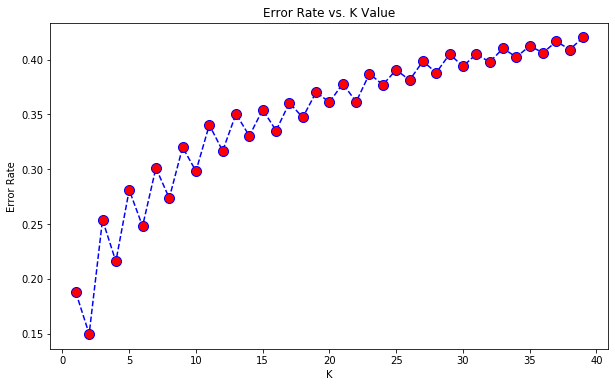

In [55]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8501945525291829 at K = 1


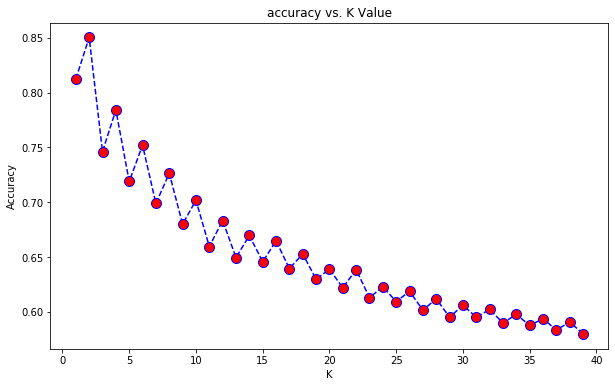

In [56]:
acc = []
# Will take some time
#from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

gird search complete. 
### creating KNN modle with 11 neighbors

In [57]:
#from sklearn.metrics import accuracy_score
modelknn = KNeighborsClassifier(n_neighbors = 11)

In [58]:
# fit the model with the training data
modelknn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [59]:
# predict the target on the train dataset
predict_train = modelknn.predict(X_train)
predict_train
predict_test = modelknn.predict(X_test)
predict_test

array([1, 1, 0, ..., 1, 1, 0])

### metrics for KNN model with 14 neighbors

In [60]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('the accuracy score of train dataset is : ', round(trainaccuracy,2))

the accuracy score of train dataset is :  0.71


In [61]:
# Confusion matrix 
trainaccuracy = accuracy_score(y_train,predict_train)

confmatrixKNN = confusion_matrix(y_train, predict_train )
print(confmatrixKNN)

TP = confmatrixKNN[1,1] # true positive 
TN = confmatrixKNN[0,0] # true negatives
FP = confmatrixKNN[0,1] # false positives
FN = confmatrixKNN[1,0] # false negatives

train_sensitivity= TP / float(TP+FN)
train_specificity= TN / float(TN+FP)


[[1488 2046]
 [  12 3648]]


In [62]:
testaccuracy= accuracy_score(y_test,predict_test)
confmatrix_2KNN = confusion_matrix(y_test, predict_test )
print(confmatrix_2KNN)

TP = confmatrix_2KNN[1,1] # true positive 
TN = confmatrix_2KNN[0,0] # true negatives
FP = confmatrix_2KNN[0,1] # false positives
FN = confmatrix_2KNN[1,0] # false negatives

testsensitivity=TP / float(TP+FN)
testspecificity= TN / float(TN+FP)


[[ 555 1050]
 [   0 1479]]


In [63]:
#training data metrics
print("\u0332".join("training data's metrics for KNN model "))
print('Train Data Accuracy......:{} %'.format(round((trainaccuracy*100),2)))
print('Train Data Sensitivity...:{} %'.format(round((train_sensitivity*100),2)))
print('Train Data Specificity...:{} %'.format(round((train_specificity*100),2)))
print("\u0332".join("Testing data's metrics for KNN model"))
print('Test Data Accuracy.......:{} %'.format(round((testaccuracy*100),2)))
print('Test Data Sensitivity....:{} %'.format(round((testsensitivity*100),2)))
print('Test Data Specificity....:{} %'.format(round((testspecificity*100),2)))

t̲r̲a̲i̲n̲i̲n̲g̲ ̲d̲a̲t̲a̲'̲s̲ ̲m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲K̲N̲N̲ ̲m̲o̲d̲e̲l̲ 
Train Data Accuracy......:71.39 %
Train Data Sensitivity...:99.67 %
Train Data Specificity...:42.11 %
T̲e̲s̲t̲i̲n̲g̲ ̲d̲a̲t̲a̲'̲s̲ ̲m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲K̲N̲N̲ ̲m̲o̲d̲e̲l
Test Data Accuracy.......:65.95 %
Test Data Sensitivity....:100.0 %
Test Data Specificity....:34.58 %


plotting the ROC curve of the model usinf sklearn.metrics package

In [64]:
fpr, tpr, thresholds = roc_curve(y_train, predict_train, drop_intermediate = False)

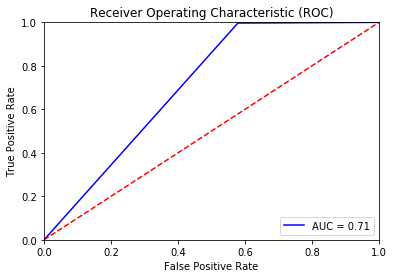

In [65]:
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

calculating metrics of the test dataset

predicting the target on the test data set

In [66]:
predict_test = modelknn.predict(X_test)
print('Target on test data: ',predict_test)

Target on test data:  [1 1 0 ... 1 1 0]


In [67]:
index = ['KNN', 'RandomForestClassifier', 'GXBoostingClassifier']
score_table = pd.DataFrame(index = index, columns= ['accuracy_train','f1_score_train','accuracy_test','f1_score_test'])
compute_log_result('KNN', predict_train, predict_test)

Classification results based on the testset:
               precision    recall  f1-score   support

           0       1.00      0.35      0.51      1605
           1       0.58      1.00      0.74      1479

    accuracy                           0.66      3084
   macro avg       0.79      0.67      0.63      3084
weighted avg       0.80      0.66      0.62      3084



###  random forest calssifier 

importing packages 

In [68]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [69]:
y_pred = rfc.predict(X_test)
metrix(y_test, y_pred)

0.9610894941634242
[[1605    0]
 [ 120 1359]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1605
           1       1.00      0.92      0.96      1479

    accuracy                           0.96      3084
   macro avg       0.97      0.96      0.96      3084
weighted avg       0.96      0.96      0.96      3084



In [70]:
y_pred = rfc.predict(X)
metrix(y, y_pred)

0.8811428571428571
[[6103  312]
 [ 520   65]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      6415
           1       0.17      0.11      0.14       585

    accuracy                           0.88      7000
   macro avg       0.55      0.53      0.54      7000
weighted avg       0.86      0.88      0.87      7000



In [71]:
predict_train = rfc.predict(X_train)
predict_train

array([1, 1, 1, ..., 0, 1, 0])

### calculating metrics for Random Forest Classifier

calculations of metrics for the training data 

In [72]:
# Confusion matrix 
confmatrixRF = confusion_matrix(y_train, predict_train)
print(confmatrixRF)

TPrf = confmatrixRF[1,1] # true positive 
TNrf = confmatrixRF[0,0] # true negatives
FPrf = confmatrixRF[0,1] # false positives
FNrf = confmatrixRF[1,0] # false negatives
trainaccuracyrf= accuracy_score(y_train,predict_train)
train_sensitivityrf= TPrf / float(TPrf+FNrf)
train_specificityrf= TNrf / float(TNrf+FPrf)

[[3534    0]
 [   0 3660]]


In [73]:
predict_test = rfc.predict(X_test)
confmatrix_2RF = confusion_matrix(y_test, predict_test)
print(confmatrix_2RF)
TPrf = confmatrix_2RF[1,1] # true positive 
TNrf = confmatrix_2RF[0,0] # true negatives
FPrf = confmatrix_2RF[0,1] # false positives
FNrf = confmatrix_2RF[1,0] # false negatives
testaccuracyrf= accuracy_score(y_test,predict_test)
testsensitivityrf=TPrf / float(TPrf+FNrf)
testspecificityrf= TNrf / float(TNrf+FPrf)

[[1605    0]
 [ 120 1359]]


In [74]:
#training data metrics
print("\u0332".join("training data's metrics for Random Forest model"))
print('Train Data Accuracy......:{} %'.format(round((trainaccuracyrf*100),2)))
print('Train Data Sensitivity...:{} %'.format(round((train_sensitivityrf*100),2)))
print('Train Data Specificity...:{} %'.format(round((train_specificityrf*100),2)))
print("\u0332".join("Testing data's metrics for Random Forest model"))
print('Test Data Accuracy.......:{} %'.format(round((testaccuracyrf*100),2)))
print('Test Data Sensitivity....:{} %'.format(round((testsensitivityrf*100),2)))
print('Test Data Specificity....:{} %'.format(round((testspecificityrf*100),2)))

t̲r̲a̲i̲n̲i̲n̲g̲ ̲d̲a̲t̲a̲'̲s̲ ̲m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲R̲a̲n̲d̲o̲m̲ ̲F̲o̲r̲e̲s̲t̲ ̲m̲o̲d̲e̲l
Train Data Accuracy......:100.0 %
Train Data Sensitivity...:100.0 %
Train Data Specificity...:100.0 %
T̲e̲s̲t̲i̲n̲g̲ ̲d̲a̲t̲a̲'̲s̲ ̲m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲R̲a̲n̲d̲o̲m̲ ̲F̲o̲r̲e̲s̲t̲ ̲m̲o̲d̲e̲l
Test Data Accuracy.......:96.11 %
Test Data Sensitivity....:91.89 %
Test Data Specificity....:100.0 %


In [75]:
fpr, tpr, thresholds = roc_curve(y_train, predict_train, drop_intermediate = False)

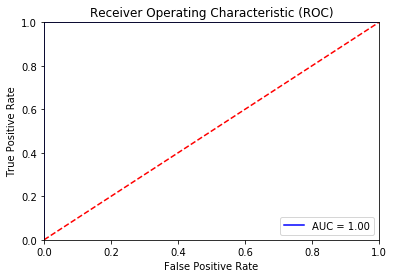

In [76]:
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### summary of metrics for Random Forest Classifier 

In [77]:
compute_log_result('RandomForestClassifier', predict_train, predict_test)

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1605
           1       1.00      0.92      0.96      1479

    accuracy                           0.96      3084
   macro avg       0.97      0.96      0.96      3084
weighted avg       0.96      0.96      0.96      3084



### XGBoosting classifier 

In [78]:
modelxgb = XGBClassifier()
modelxgb.fit(X_train, y_train)

XGBClassifier()

In [79]:
# predict the target on the train dataset
predict_train = modelxgb.predict(X_train) 
predict_train

array([0, 1, 1, ..., 0, 1, 0])

### calculating metrics of XGBClassifier 

metrics of training data set

In [80]:
trainaccuracy = accuracy_score(y_train,predict_train)
print('accuracy_score on train dataset : ', trainaccuracy)
# Confusion matrix 
confmatrixXGB = confusion_matrix(y_train, predict_train)
print(confmatrixXGB)
TP = confmatrixXGB[1,1] # true positive 
TN = confmatrixXGB[0,0] # true negatives
FP = confmatrixXGB[0,1] # false positives
FN = confmatrixXGB[1,0] # false negatives
trainaccuracyxgb = accuracy_score(y_train,predict_train)
train_sensitivityxgb= TP / float(TP+FN)
train_specificityxgb= TN / float(TN+FP)


accuracy_score on train dataset :  0.9528773978315263
[[3514   20]
 [ 319 3341]]


In [81]:
confmatrix_2XGB = confusion_matrix(y_test, predict_test)
print(confmatrix_2XGB)
TP = confmatrix_2XGB[1,1] # true positive 
TN = confmatrix_2XGB[0,0] # true negatives
FP = confmatrix_2XGB[0,1] # false positives
FN = confmatrix_2XGB[1,0] # false negatives
testaccuracyxgb= accuracy_score(y_test,predict_test)
testsensitivityxgb=TP / float(TP+FN)
testspecificityxgb= TN / float(TN+FP)

[[1605    0]
 [ 120 1359]]


In [82]:
#training data metrics
print("\u0332".join("training data's metrics for XGBoost model"))
print('Train Data Accuracy......:{} %'.format(round((trainaccuracyxgb*100),2)))
print('Train Data Sensitivity...:{} %'.format(round((train_sensitivityxgb*100),2)))
print('Train Data Specificity...:{} %'.format(round((train_specificityxgb*100),2)))
print("\u0332".join("Testing data's metrics for XGBoost model"))
print('Test Data Accuracy.......:{} %'.format(round((testaccuracyxgb*100),2)))
print('Test Data Sensitivity....:{} %'.format(round((testsensitivityxgb*100),2)))
print('Test Data Specificity....:{} %'.format(round((testspecificityxgb*100),2)))

t̲r̲a̲i̲n̲i̲n̲g̲ ̲d̲a̲t̲a̲'̲s̲ ̲m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲X̲G̲B̲o̲o̲s̲t̲ ̲m̲o̲d̲e̲l
Train Data Accuracy......:95.29 %
Train Data Sensitivity...:91.28 %
Train Data Specificity...:99.43 %
T̲e̲s̲t̲i̲n̲g̲ ̲d̲a̲t̲a̲'̲s̲ ̲m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲X̲G̲B̲o̲o̲s̲t̲ ̲m̲o̲d̲e̲l
Test Data Accuracy.......:96.11 %
Test Data Sensitivity....:91.89 %
Test Data Specificity....:100.0 %


### summary of XGBClassifier metrics 

In [83]:
compute_log_result('GXBoostingClassifier', predict_train, predict_test)

Classification results based on the testset:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1605
           1       1.00      0.92      0.96      1479

    accuracy                           0.96      3084
   macro avg       0.97      0.96      0.96      3084
weighted avg       0.96      0.96      0.96      3084



In [84]:
print(score_table)

                       accuracy_train f1_score_train accuracy_test  \
KNN                          0.713928       0.779987      0.659533   
RandomForestClassifier              1              1      0.961089   
GXBoostingClassifier         0.952877       0.951716      0.961089   

                       f1_score_test  
KNN                         0.738024  
RandomForestClassifier      0.957717  
GXBoostingClassifier        0.957717  


### training data on the initial 20% of data that is not balanced. 

In [85]:
#standardizing the imbalanced X_test subset of data
X_test20[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x',
         'AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
         'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS',
         'HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY','OBS_30_CNT_SOCIAL_CIRCLE',
         'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
         'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
         'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
         'AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y',
         'AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
         'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT',
         ]] = scaler.transform(X_test20[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT_x',
                                                               'AMT_ANNUITY_x','AMT_GOODS_PRICE_x','REGION_POPULATION_RELATIVE',
                                                               'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH',
                                                               'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START_x','LIVE_CITY_NOT_WORK_CITY',
                                                               'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                                                               'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
                                                               'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
                                                               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','AMT_ANNUITY_y','AMT_APPLICATION',
                                                               'AMT_CREDIT_y','AMT_GOODS_PRICE_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                                                               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT']])

X_test.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_Cash X-Sell: middle,PRODUCT_COMBINATION_POS household with interest,PRODUCT_COMBINATION_POS household without interest,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS industry without interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_POS mobile without interest,PRODUCT_COMBINATION_POS other with interest,PRODUCT_COMBINATION_POS others without interest
445,-0.509379,-1.271242,-0.343829,-0.186031,-0.172294,-1.050572,-0.274142,-0.470917,-1.631852,1.681099,...,0,0,0,0,0,1,0,0,0,0
6186,1.079725,-0.150470,-0.678959,-0.783912,-0.538923,1.180579,0.086598,-0.455097,-0.762987,-0.258578,...,0,0,0,0,0,0,0,0,0,0
689,-0.509379,-1.097842,-0.986144,-1.240005,-0.874980,-0.437313,1.841105,-0.449946,-1.030933,1.435534,...,0,0,0,0,0,0,1,0,0,0
1353,-0.509379,0.173751,3.044067,2.831375,3.534029,0.963108,-1.039026,2.175432,0.122930,-0.366456,...,1,0,0,0,0,0,0,0,0,0
185,1.079725,-0.404246,-0.482367,-0.515624,-0.323854,-0.820535,0.587679,-0.455342,-0.747933,-1.963336,...,0,0,0,0,0,0,1,0,0,0


# KNN on the 20% inbalanced data set aside

note: the KNN model has already been created so to maximize accuracy of the metrics, the same model will be used on the 20% unbalanced dataset that was reserved for this reason specifically

In [86]:
predict_testknn20 = modelknn.predict(X_test20)
predict_testknn20

array([1, 1, 1, ..., 0, 1, 0])

In [87]:
KNN_testaccuracy= accuracy_score(y_test20,predict_testknn20)
confmatrix_2KNN = confusion_matrix(y_test20, predict_testknn20)
print(confmatrix_2KNN)

TP = confmatrix_2KNN[1,1] # true positive 
TN = confmatrix_2KNN[0,0] # true negatives
FP = confmatrix_2KNN[0,1] # false positives
FN = confmatrix_2KNN[1,0] # false negatives

KNN_testsensitivity=TP / float(TP+FN)
KNN_testspecificity= TN / float(TN+FP)


[[457 819]
 [ 40  84]]


In [88]:
print("\u0332".join("metrics for KNN on the 20% of data set aside before applying SMOTE"))
print('Test Data Accuracy.......:{} %'.format(round((KNN_testaccuracy*100),2)))
print('Test Data Sensitivity....:{} %'.format(round((KNN_testsensitivity*100),2)))
print('Test Data Specificity....:{} %'.format(round((KNN_testspecificity*100),2)))

m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲K̲N̲N̲ ̲o̲n̲ ̲t̲h̲e̲ ̲2̲0̲%̲ ̲o̲f̲ ̲d̲a̲t̲a̲ ̲s̲e̲t̲ ̲a̲s̲i̲d̲e̲ ̲b̲e̲f̲o̲r̲e̲ ̲a̲p̲p̲l̲y̲i̲n̲g̲ ̲S̲M̲O̲T̲E
Test Data Accuracy.......:38.64 %
Test Data Sensitivity....:67.74 %
Test Data Specificity....:35.82 %


# Random forest on 20% inbalanced data

In [89]:
predict_test20rfc = rfc.predict(X_test20)

confmatrix_2RF = confusion_matrix(y_test20, predict_test20rfc) #predict_train
print(confmatrix_2RF)
TP = confmatrix_2RF[1,1] # true positive 
TN = confmatrix_2RF[0,0] # true negatives
FP = confmatrix_2RF[0,1] # false positives
FN = confmatrix_2RF[1,0] # false negatives
RFC_testaccuracy= accuracy_score(y_test20,predict_test20rfc)
RFC_testsensitivity=TP / float(TP+FN)
RFC_testspecificity= TN / float(TN+FP)


[[1273    3]
 [ 124    0]]


In [90]:
print("\u0332".join("metrics for RFClassifier on the 20% of data set aside before applying SMOTE"))
print('Test Data Accuracy.......:{} %'.format(round((RFC_testaccuracy*100),2)))
print('Test Data Sensitivity....:{} %'.format(round((RFC_testsensitivity*100),2)))
print('Test Data Specificity....:{} %'.format(round((RFC_testspecificity*100),2)))

m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲R̲F̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r̲ ̲o̲n̲ ̲t̲h̲e̲ ̲2̲0̲%̲ ̲o̲f̲ ̲d̲a̲t̲a̲ ̲s̲e̲t̲ ̲a̲s̲i̲d̲e̲ ̲b̲e̲f̲o̲r̲e̲ ̲a̲p̲p̲l̲y̲i̲n̲g̲ ̲S̲M̲O̲T̲E
Test Data Accuracy.......:90.93 %
Test Data Sensitivity....:0.0 %
Test Data Specificity....:99.76 %


# XGBclassifier on 20% inbalanced data

In [91]:
predict_testXGB20 = modelxgb.predict(X_test20)

In [92]:
confmatrix_2XGB = confusion_matrix(y_test20, predict_testXGB20)
print(confmatrix_2XGB)
TPxgb = confmatrix_2XGB[1,1] # true positive 
TNxgb = confmatrix_2XGB[0,0] # true negatives
FPxgb = confmatrix_2XGB[0,1] # false positives
FNxgb = confmatrix_2XGB[1,0] # false negatives
testaccuracyxgb= accuracy_score(y_test20,predict_testXGB20)
testsensitivityxgb=TPxgb / float(TPxgb+FNxgb)
testspecificityxgb= TNxgb / float(TNxgb+FPxgb)


[[1264   12]
 [ 121    3]]


In [93]:
print("\u0332".join("metrics for XGBClassifier on the 20% of data set aside before applying SMOTE"))
print('Test Data Accuracy.......:{} %'.format(round((testaccuracyxgb*100),2)))
print('Test Data Sensitivity....:{} %'.format(round((testsensitivityxgb*100),2)))
print('Test Data Specificity....:{} %'.format(round((testspecificityxgb*100),2)))

m̲e̲t̲r̲i̲c̲s̲ ̲f̲o̲r̲ ̲X̲G̲B̲C̲l̲a̲s̲s̲i̲f̲i̲e̲r̲ ̲o̲n̲ ̲t̲h̲e̲ ̲2̲0̲%̲ ̲o̲f̲ ̲d̲a̲t̲a̲ ̲s̲e̲t̲ ̲a̲s̲i̲d̲e̲ ̲b̲e̲f̲o̲r̲e̲ ̲a̲p̲p̲l̲y̲i̲n̲g̲ ̲S̲M̲O̲T̲E
Test Data Accuracy.......:90.5 %
Test Data Sensitivity....:2.42 %
Test Data Specificity....:99.06 %


### summary

SMOTE was initially used to to balance out the data for the model and initially all three models had a sensitivity well above 90% however, after testing the models on a subset of the original data we see that KNN yielded a sensitivity of 77.87% while the remaining two models are less than 1%

Being that the NKK modle yielded the higest performance, this is the best model to persue and is now ready to predict wether or not individuals will default on their loan if they are approved